In [172]:
import pandas as pd
import numpy as np
from mlxtend.plotting import plot_decision_regions

In [173]:
df= pd.DataFrame()

In [174]:
df['X1']=[1,2,3,4,5,6,6,7,9,9]
df['X2']=[5,3,6,8,1,9,5,8,9,2]
df['Label']=[1,1,0,1,0,1,0,1,0,0]


In [175]:
df

,X1,X2,Label
0,1,5,1
1,2,3,1
2,3,6,0
3,4,8,1
4,5,1,0
5,6,9,1
6,6,5,0
7,7,8,1
8,9,9,0
9,9,2,0


<Axes: xlabel='X1', ylabel='X2'>

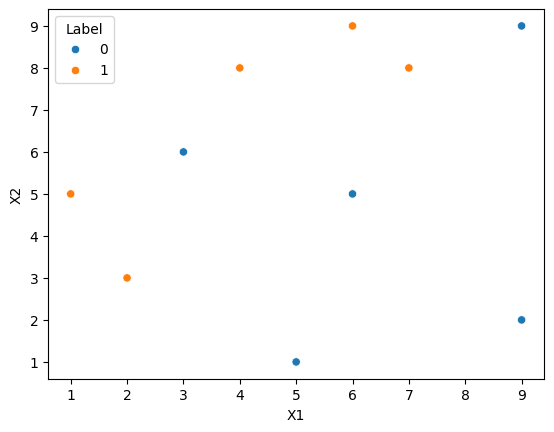

In [176]:
import seaborn as sns
sns.scatterplot(data=df, x='X1', y='X2', hue='Label')

In [177]:
df['weights']=1/df.shape[0]

In [178]:
df

,X1,X2,Label,weights
0,1,5,1,0.1
1,2,3,1,0.1
2,3,6,0,0.1
3,4,8,1,0.1
4,5,1,0,0.1
5,6,9,1,0.1
6,6,5,0,0.1
7,7,8,1,0.1
8,9,9,0,0.1
9,9,2,0,0.1


In [179]:
from sklearn.tree import DecisionTreeClassifier

In [180]:
dt1= DecisionTreeClassifier(max_depth=1)

In [181]:
X=df.iloc[:, :-2].values
y=df.iloc[:,2].values

In [182]:
y

array([1, 1, 0, 1, 0, 1, 0, 1, 0, 0])

In [183]:
X

array([[1, 5],
       [2, 3],
       [3, 6],
       [4, 8],
       [5, 1],
       [6, 9],
       [6, 5],
       [7, 8],
       [9, 9],
       [9, 2]])

In [184]:
dt1.fit(X,y)

DecisionTreeClassifier(max_depth=1)

[Text(0.5, 0.75, 'x[0] <= 2.5\ngini = 0.5\nsamples = 10\nvalue = [5, 5]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.375, 0.5, 'True  '),
 Text(0.75, 0.25, 'gini = 0.469\nsamples = 8\nvalue = [5, 3]'),
 Text(0.625, 0.5, '  False')]

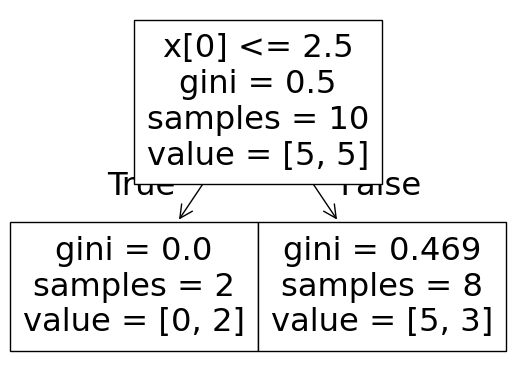

In [185]:
from sklearn.tree import plot_tree
plot_tree(dt1)

<Axes: >

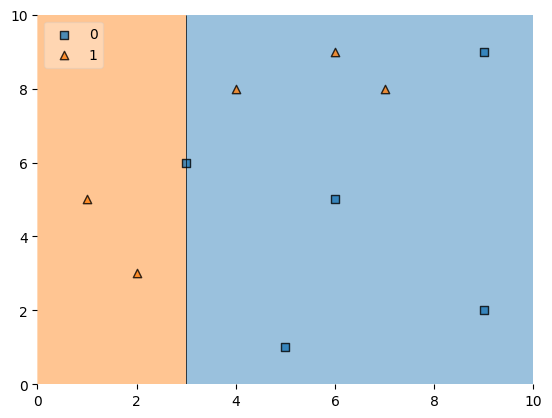

In [186]:
plot_decision_regions(X, y, clf=dt1, legend=2)

In [187]:
df['y_pred']=dt1.predict(X)

In [188]:
df

,X1,X2,Label,weights,y_pred
0,1,5,1,0.1,1
1,2,3,1,0.1,1
2,3,6,0,0.1,0
3,4,8,1,0.1,0
4,5,1,0,0.1,0
5,6,9,1,0.1,0
6,6,5,0,0.1,0
7,7,8,1,0.1,0
8,9,9,0,0.1,0
9,9,2,0,0.1,0


In [189]:
def calculate_error_weight(error):
    return 0.5 * np.log((1 - error) / (error))

In [190]:
alpha1= calculate_error_weight(0.3)
alpha1

np.float64(0.42364893019360184)

In [191]:
def update_row_weights(row,alpha=0.423):
    if row['Label'] == row['y_pred']:
        return row['weights'] * np.exp(-alpha)
    else:
        return row['weights'] * np.exp(alpha)

In [192]:
df['updated_weights']=df.apply(update_row_weights, axis=1)

In [193]:
df

,X1,X2,Label,weights,y_pred,updated_weights
0,1,5,1,0.1,1,0.065508
1,2,3,1,0.1,1,0.065508
2,3,6,0,0.1,0,0.065508
3,4,8,1,0.1,0,0.152653
4,5,1,0,0.1,0,0.065508
5,6,9,1,0.1,0,0.152653
6,6,5,0,0.1,0,0.065508
7,7,8,1,0.1,0,0.152653
8,9,9,0,0.1,0,0.065508
9,9,2,0,0.1,0,0.065508


In [194]:
df['updated_weights'].sum()

np.float64(0.9165153319682015)

In [195]:
df['normalized_weights']=df['updated_weights']/df['updated_weights'].sum()

In [196]:
df

,X1,X2,Label,weights,y_pred,updated_weights,normalized_weights
0,1,5,1,0.1,1,0.065508,0.071475
1,2,3,1,0.1,1,0.065508,0.071475
2,3,6,0,0.1,0,0.065508,0.071475
3,4,8,1,0.1,0,0.152653,0.166559
4,5,1,0,0.1,0,0.065508,0.071475
5,6,9,1,0.1,0,0.152653,0.166559
6,6,5,0,0.1,0,0.065508,0.071475
7,7,8,1,0.1,0,0.152653,0.166559
8,9,9,0,0.1,0,0.065508,0.071475
9,9,2,0,0.1,0,0.065508,0.071475


In [197]:
df['normalized_weights'].sum()

np.float64(1.0)

In [198]:
df['cumsum_upper']=np.cumsum(df['normalized_weights'])

In [199]:
df['cumsum_lower']=df['cumsum_upper']-df['normalized_weights']

In [200]:
df[['X1','X2','Label','weights','y_pred','updated_weights','normalized_weights','cumsum_lower','cumsum_upper']]

,X1,X2,Label,weights,y_pred,updated_weights,normalized_weights,cumsum_lower,cumsum_upper
0,1,5,1,0.1,1,0.065508,0.071475,0.000000,0.071475
1,2,3,1,0.1,1,0.065508,0.071475,0.071475,0.142950
2,3,6,0,0.1,0,0.065508,0.071475,0.142950,0.214425
3,4,8,1,0.1,0,0.152653,0.166559,0.214425,0.380983
4,5,1,0,0.1,0,0.065508,0.071475,0.380983,0.452458
5,6,9,1,0.1,0,0.152653,0.166559,0.452458,0.619017
6,6,5,0,0.1,0,0.065508,0.071475,0.619017,0.690492
7,7,8,1,0.1,0,0.152653,0.166559,0.690492,0.857050
8,9,9,0,0.1,0,0.065508,0.071475,0.857050,0.928525
9,9,2,0,0.1,0,0.065508,0.071475,0.928525,1.000000


In [201]:
def create_new_dataset(df):

  indices = []

  for i in range(df.shape[0]):
    a = np.random.random()
    for index,row in df.iterrows():
      if row['cumsum_upper'] > a and a > row['cumsum_lower']:
        indices.append(index)
  return indices

In [202]:
index_values = create_new_dataset(df)

index_values

[4, 9, 6, 9, 7, 3, 2, 8, 4, 5]

In [203]:
second_df = df.iloc[index_values,[0,1,2,3]]

In [204]:
second_df

,X1,X2,Label,weights
4,5,1,0,0.1
9,9,2,0,0.1
6,6,5,0,0.1
9,9,2,0,0.1
7,7,8,1,0.1
3,4,8,1,0.1
2,3,6,0,0.1
8,9,9,0,0.1
4,5,1,0,0.1
5,6,9,1,0.1


In [205]:
dt2 = DecisionTreeClassifier(max_depth=1)
     

X = second_df.iloc[:,0:2].values
y = second_df.iloc[:,2].values
     

dt2.fit(X,y)

DecisionTreeClassifier(max_depth=1)

[Text(0.5, 0.75, 'x[1] <= 7.0\ngini = 0.42\nsamples = 10\nvalue = [7, 3]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 6\nvalue = [6, 0]'),
 Text(0.375, 0.5, 'True  '),
 Text(0.75, 0.25, 'gini = 0.375\nsamples = 4\nvalue = [1, 3]'),
 Text(0.625, 0.5, '  False')]

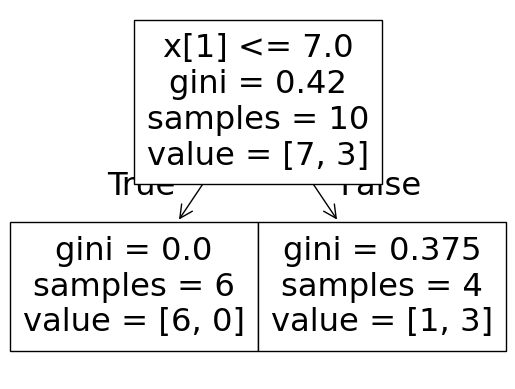

In [206]:
plot_tree(dt2)


<Axes: >

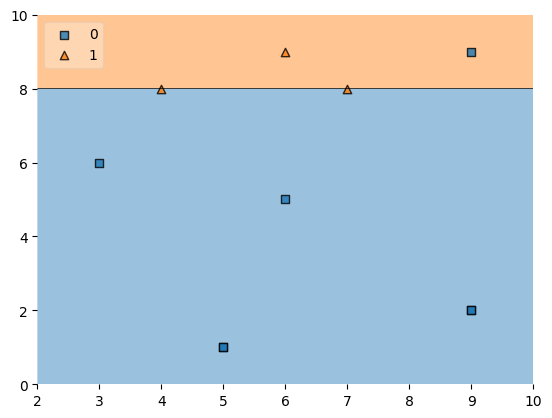

In [207]:
plot_decision_regions(X, y, clf=dt2, legend=2)


In [208]:
second_df['y_pred'] = dt2.predict(X)
     

second_df

,X1,X2,Label,weights,y_pred
4,5,1,0,0.1,0
9,9,2,0,0.1,0
6,6,5,0,0.1,0
9,9,2,0,0.1,0
7,7,8,1,0.1,1
3,4,8,1,0.1,1
2,3,6,0,0.1,0
8,9,9,0,0.1,1
4,5,1,0,0.1,0
5,6,9,1,0.1,1


In [209]:
alpha2 = calculate_error_weight(0.1)

In [210]:
alpha2

np.float64(1.0986122886681098)

In [211]:
def update_row_weights(row,alpha=1.09):
  if row['Label'] == row['y_pred']:
    return row['weights'] * np.exp(-alpha)
  else:
    return row['weights'] * np.exp(alpha)

In [212]:
second_df['updated_weights'] = second_df.apply(update_row_weights,axis=1)

In [213]:
second_df


,X1,X2,Label,weights,y_pred,updated_weights
4,5,1,0,0.1,0,0.033622
9,9,2,0,0.1,0,0.033622
6,6,5,0,0.1,0,0.033622
9,9,2,0,0.1,0,0.033622
7,7,8,1,0.1,1,0.033622
3,4,8,1,0.1,1,0.033622
2,3,6,0,0.1,0,0.033622
8,9,9,0,0.1,1,0.297427
4,5,1,0,0.1,0,0.033622
5,6,9,1,0.1,1,0.033622


In [214]:
second_df['nomalized_weights'] = second_df['updated_weights']/second_df['updated_weights'].sum()
     

second_df

,X1,X2,Label,weights,y_pred,updated_weights,nomalized_weights
4,5,1,0,0.1,0,0.033622,0.056034
9,9,2,0,0.1,0,0.033622,0.056034
6,6,5,0,0.1,0,0.033622,0.056034
9,9,2,0,0.1,0,0.033622,0.056034
7,7,8,1,0.1,1,0.033622,0.056034
3,4,8,1,0.1,1,0.033622,0.056034
2,3,6,0,0.1,0,0.033622,0.056034
8,9,9,0,0.1,1,0.297427,0.495694
4,5,1,0,0.1,0,0.033622,0.056034
5,6,9,1,0.1,1,0.033622,0.056034


In [215]:
second_df['nomalized_weights'].sum()


np.float64(0.9999999999999999)

In [216]:
second_df['cumsum_upper'] = np.cumsum(second_df['nomalized_weights'])
     

second_df['cumsum_lower'] = second_df['cumsum_upper'] - second_df['nomalized_weights']
     

second_df[['X1','X2','Label','weights','y_pred','nomalized_weights','cumsum_lower','cumsum_upper']]

,X1,X2,Label,weights,y_pred,nomalized_weights,cumsum_lower,cumsum_upper
4,5,1,0,0.1,0,0.056034,0.000000,0.056034
9,9,2,0,0.1,0,0.056034,0.056034,0.112068
6,6,5,0,0.1,0,0.056034,0.112068,0.168102
9,9,2,0,0.1,0,0.056034,0.168102,0.224136
7,7,8,1,0.1,1,0.056034,0.224136,0.280170
3,4,8,1,0.1,1,0.056034,0.280170,0.336204
2,3,6,0,0.1,0,0.056034,0.336204,0.392238
8,9,9,0,0.1,1,0.495694,0.392238,0.887932
4,5,1,0,0.1,0,0.056034,0.887932,0.943966
5,6,9,1,0.1,1,0.056034,0.943966,1.000000


In [217]:
index_values = create_new_dataset(second_df)
     

third_df = second_df.iloc[index_values,[0,1,2,3]]
     

third_df

,X1,X2,Label,weights
5,6,9,1,0.1
5,6,9,1,0.1
4,5,1,0,0.1
8,9,9,0,0.1
4,5,1,0,0.1
6,6,5,0,0.1
4,5,1,0,0.1
9,9,2,0,0.1
8,9,9,0,0.1
4,5,1,0,0.1


In [218]:
dt3 = DecisionTreeClassifier(max_depth=1)

X = second_df.iloc[:,0:2].values
y = second_df.iloc[:,2].values

dt3.fit(X,y)

DecisionTreeClassifier(max_depth=1)

<Axes: >

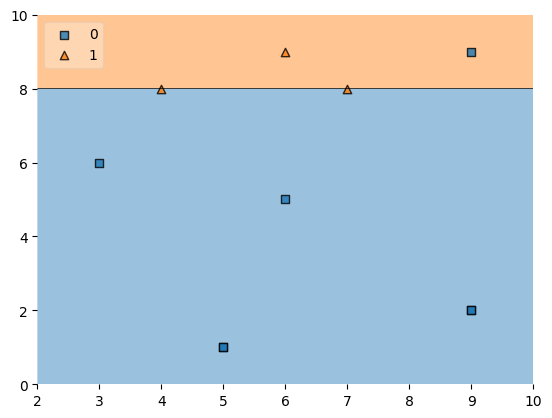

In [219]:
plot_decision_regions(X, y, clf=dt3, legend=2)


In [220]:
third_df['y_pred'] = dt3.predict(X)
     

third_df
     

,X1,X2,Label,weights,y_pred
5,6,9,1,0.1,0
5,6,9,1,0.1,0
4,5,1,0,0.1,0
8,9,9,0,0.1,0
4,5,1,0,0.1,1
6,6,5,0,0.1,1
4,5,1,0,0.1,0
9,9,2,0,0.1,1
8,9,9,0,0.1,0
4,5,1,0,0.1,1


In [221]:
alpha3 = calculate_error_weight(0.7)
alpha3

np.float64(-0.4236489301936017)

In [222]:
print(alpha1,alpha2,alpha3)


0.42364893019360184 1.0986122886681098 -0.4236489301936017


## prediction

In [223]:
query = np.array([1,5]).reshape(1,2)
dt1.predict(query)

array([1])

In [224]:
dt2.predict(query)


array([0])

In [225]:
dt3.predict(query)


array([0])

In [226]:
alpha1*1 + alpha2*(1) + alpha3*(1)


np.float64(1.09861228866811)

In [227]:
np.sign(1.09)


np.float64(1.0)

In [228]:
query = np.array([9,9]).reshape(1,2)
dt1.predict(query)

array([0])

In [229]:
dt2.predict(query)


array([1])

In [230]:
dt3.predict(query)

array([1])

In [231]:
alpha1*(1) + alpha2*(-1) + alpha3*(-1)

np.float64(-0.2513144282809062)

In [232]:
np.sign(-0.25)

np.float64(-1.0)